# <center> Week 6 - Python Programming : Numpy continuation <center>
## Samyog Paudel

### Classification
Gaussian Naive Bayes Classifier
Load and prepare dataset

In [2]:
import pandas as pd
from sklearn.datasets import load_iris
from IPython.display import display
# Load the Iris dataset
iris = load_iris() 
# create new dataframe from iris data
iris_df = pd.DataFrame(data=iris.data, columns=iris.feature_names)
iris_df['species'] = iris.target
iris_df['species'] = iris_df['species'].map({0: 'setosa', 1: 'versicolor', 2: 'virginica'})

display(iris_df.head())
X = iris_df[['sepal length (cm)',	'sepal width (cm)',	'petal length (cm)'	,'petal width (cm)']]  
y = iris_df['species']  # Target (species: 0=setosa, 1=versicolor, 2=virginica)

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


### Split data into test and train dataset

In [3]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


### Train the GNB Classifier

In [ ]:
from sklearn.naive_bayes import GaussianNB
gnb = GaussianNB()
gnb.fit(X_train, y_train)

GaussianNB()

### Make Predictions


In [10]:
# Make predictions
y_pred = gnb.predict(X_test)


### Evaluate the model

In [6]:
from sklearn.metrics import accuracy_score, classification_report

print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", )
print(classification_report(y_test, y_pred))

Accuracy: 1.0

Classification Report:

              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        10
  versicolor       1.00      1.00      1.00         9
   virginica       1.00      1.00      1.00        11

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30



## Clustering Algorithms
-K-means

-MeanShift

-DBSCAN
## K-Means Clustering Algorithm
-Choose the Number of Clusters (k): We decide how many clusters you want the data divided into.

-Initialize Cluster Centers: Randomly select k points from the data as initial cluster centers (also called centroids).

-Assign Data Points to Clusters: Each data point is assigned to the cluster whose centroid is closest (measured by distance, usually Euclidean).

-Update Centroids: For each cluster, compute the new centroid as the average of all points assigned to that cluster.

-Repeat: Reassign points to clusters based on the updated centroids and recompute the centroids. This process is repeated until the centroids stop changing significantly or a maximum number of iterations is reached.

-Finally The algorithm returns the final clusters and their centroids, after n number of iteration (max_iter)

In [ ]:
import pandas as pd
home_data = pd.read_csv('data/housing.csv', usecols = ['longitude', 'latitude', 'median_house_value'])
home_data.head()cd ..


,longitude,latitude,median_house_value
0,-122.23,37.88,452600.0
1,-122.22,37.86,358500.0
2,-122.24,37.85,352100.0
3,-122.25,37.85,341300.0
4,-122.25,37.85,342200.0


## Plot scattered plot to visualize the data

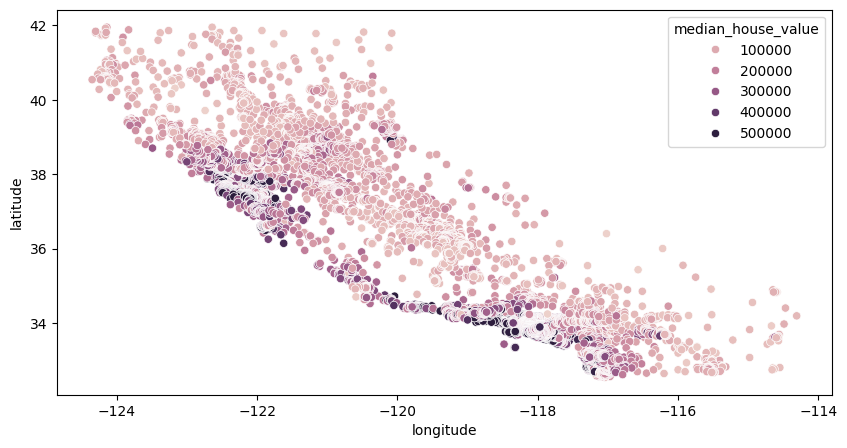

In [5]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10,5))
sns.scatterplot(data = home_data, x = 'longitude', y = 'latitude', hue = 'median_house_value')
plt.show()

## Split Train/Test and Normalize Data

In [6]:
from sklearn.model_selection import train_test_split
from sklearn import preprocessing
X_train, X_test, y_train, y_test = train_test_split(home_data[['latitude', 'longitude']], home_data[['median_house_value']], test_size=0.33, random_state=0)

X_train_norm = preprocessing.normalize(X_train)
X_test_norm = preprocessing.normalize(X_test)

## Fit the data to the K-Means Model and plot the clusters into scattered Plot

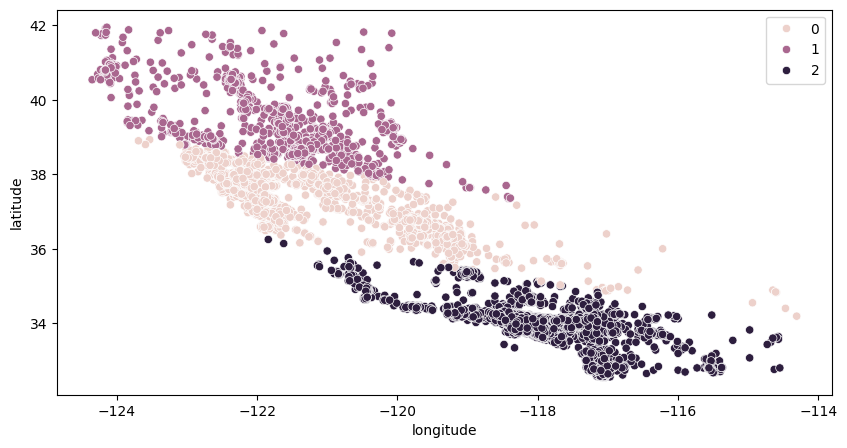

In [7]:
from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters = 3, random_state = 0, n_init='auto')
kmeans.fit(X_train_norm)

plt.figure(figsize=(10,5))
sns.scatterplot(data = X_train, x = 'longitude', y = 'latitude', hue = kmeans.labels_)
plt.show()


## Evaluate Clustering Model using Silhouetee Score (lower score represents a better fit)

In [8]:
from sklearn.metrics import silhouette_score
silhouette_score(X_train_norm, kmeans.labels_, metric='euclidean')

np.float64(0.7499371920703546)

## Confusion Matrix

- Accuracy = (TP+TN)/(TP+FP+TN+FN)
- Precision = TP/(TP+FP)
- Recall = TP/(TP+FN)
- where; T is True ,F is False, P is Positive, and N is Negetive 

# Deep Learning
## Design simple artificial neural network
- 1 input
- 1 hidden layer
- 1 output layer

In [1]:
import numpy as np
import matplotlib.pyplot as plt

class NeuralNetwork:
    def __init__(self, input_neurons, hidden_neurons, output_neurons, learning_rate=0.01):
        # initialie network parameters
        self.input_neurons = input_neurons
        self.hidden_neurons = hidden_neurons
        self.output_neurons = output_neurons
        self.learning_rate = learning_rate

        #Random initialization of weights and biases
        np.random.seed(42)
        self.w1 = np.random.randn(input_neurons, hidden_neurons)
        self.b1 = np.random.randn(hidden_neurons)
        self.w2 = np.random.randn(hidden_neurons, output_neurons)
        self.b2 = np.random.randn(output_neurons)
    
    def sigmoid(self,x):
        return 1 / (1 + np.exp(-x))
    
    def sigmoid_derivative(self,x):
        return x * ( 1 - x )
    
    def forward_pass(self, x):
        self.z1 = np.dot(x, self.w1) + self.b1 # w1.x +b
        self.a1 = self.sigmoid(self.z1) # apply sigmoid activation funvtion f(z) = sigmoid(z)

        self.z2 = np.dot(self.a1, self.w2) + self.b2 
        self.output = self.sigmoid(self.z2) # apply sigmoid activation function

        return self.output
    
    def compute_loss(self, y_pred, y_true):
        return np.mean((y_pred - y_true)**2)
    
    def backpropagate(self, x, y_true, y_pred):
        error_output = y_pred - y_true
        d_output = error_output * self.sigmoid_derivative(y_pred)
        
        error_hidden = d_output.dot(self.w2.T)
        d_hidden = error_hidden * self.sigmoid_derivative(self.a1)

        self.w2 -= self.a1.T.dot(d_output) * self.learning_rate
        self.b2 -= np.sum(d_output, axis=0) * self.learning_rate
        
        self.w1 -= x.T.dot(d_hidden) * self.learning_rate
        self.b1 -= np.sum(d_output, axis=0) * self.learning_rate

    def train(self, X, y, epochs=5000):
        for epoch in range(epochs):
            y_pred = self.forward_pass(X)

            # Compute loss
            loss = self.compute_loss(y_pred, y)

            # Backpropagation and weights update
            self.backpropagate(X, y, y_pred)

            if epoch % 1000 == 0:
                print(self.w1, self.w2)
                print(f"Epoch {epoch}, Loss: {loss:.4f}")
            
    def predict(self, X):
        return self.forward_pass(X)

import

[[0.49671415]] [[14449.7262172]]
Epoch 0, Loss: 84800343821.3845
[[0.49671415]] [[14449.7262172]]
Epoch 1000, Loss: 84800290162.5446
[[0.49671415]] [[14449.7262172]]
Epoch 2000, Loss: 84800290162.5446
[[0.49671415]] [[14449.7262172]]
Epoch 3000, Loss: 84800290162.5446
[[0.49671415]] [[14449.7262172]]
Epoch 4000, Loss: 84800290162.5446
[[0.49671415]] [[14449.7262172]]
Epoch 5000, Loss: 84800290162.5446
[[0.49671415]] [[14449.7262172]]
Epoch 6000, Loss: 84800290162.5446
[[0.49671415]] [[14449.7262172]]
Epoch 7000, Loss: 84800290162.5446
[[0.49671415]] [[14449.7262172]]
Epoch 8000, Loss: 84800290162.5446
[[0.49671415]] [[14449.7262172]]
Epoch 9000, Loss: 84800290162.5446
[[0.49671415]] [[14449.7262172]]
Epoch 10000, Loss: 84800290162.5446
[[0.49671415]] [[14449.7262172]]
Epoch 11000, Loss: 84800290162.5446
[[0.49671415]] [[14449.7262172]]
Epoch 12000, Loss: 84800290162.5446
[[0.49671415]] [[14449.7262172]]
Epoch 13000, Loss: 84800290162.5446
[[0.49671415]] [[14449.7262172]]
Epoch 14000, L

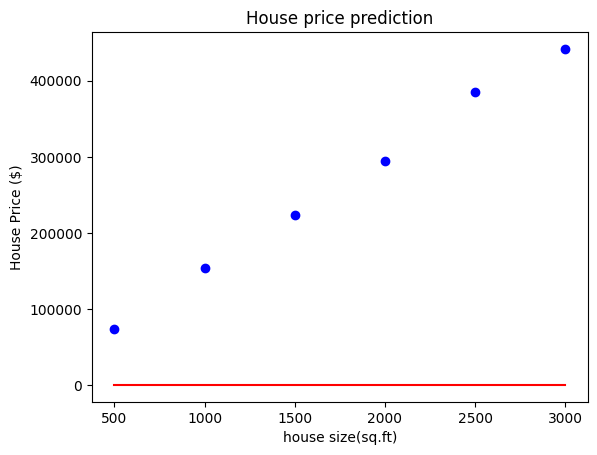

In [2]:
#create some synthetic data for house sizes and corresponding prices
np.random.seed()
X = np.array([[500],[1000],[1500],[2000],[2500],[3000]])
y = X * 150 + (np.random.randn(*X.shape)*10000) # Random noise

nn = NeuralNetwork(input_neurons=1, hidden_neurons=1, output_neurons=1, learning_rate=0.1)
nn.train(X,y, epochs=50000)

predictions = nn.predict(X)

# plotting the data
plt.scatter(X,y, color = 'blue', label='Actual prices') #Actual prices
plt.plot(X, predictions, color='red', label='Predicted prices') # Predicted Prices
plt.xlabel("house size(sq.ft)")
plt.ylabel('House Price ($)')
plt.title('House price prediction')
plt.show()

## Using Tensorflow

In [3]:
import os
os.environ["CUDA_VISIBLE_DEVICES"] = "-1"  # This will disable GPU usage.


import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten
from tensorflow.keras.datasets import mnist
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping
import numpy as np

(x_train, y_train), (x_test, y_test) = mnist.load_data()

# Normalize data (scale pixel values to range 0-1)
x_train = x_train / 255.0
x_test = x_test / 255.0

# Build the model
model = Sequential([
    Flatten(input_shape=(28, 28)),
    Dense(128, activation='relu'),
    Dense(10, activation='softmax')
])

# Set learning rate
learning_rate = 0.01 
optimizer = Adam(learning_rate=learning_rate)
model.compile(optimizer, loss ='sparse_categorical_crossentropy', metrics =['accuracy'])

early_stopping = EarlyStopping(
    monitor = 'val_loss',
    patience = 3,
    restore_best_weights = True
)

# train the model
model.fit(x_train, y_train, epochs =5, batch_size= 32)

test_loss, test_acc = model.evaluate(x_test, y_test)
print(f"Test accuracy: {test_acc}")

predictions = model.predict(x_test)
print(f"Prediction for first test image: {np.argmax(predictions[0])}")



11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 2s 0us/step


c:\Users\Victus\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\reshaping\flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 1ms/step - accuracy: 0.8966 - loss: 0.3369
Epoch 2/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.9559 - loss: 0.1550
Epoch 3/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.9636 - loss: 0.1328
Epoch 4/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.9666 - loss: 0.1251
Epoch 5/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.9692 - loss: 0.1136
313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 930us/step - accuracy: 0.9536 - loss: 0.2139
Test accuracy: 0.9599000215530396
313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 908us/step
Prediction for first test image: 7


In [4]:
from tensorflow.keras.models import load_model
from PIL import Image
import numpy as np
import os

# Load the trained model
model = load_model('trained-data/handwritten-digit-model.keras')

def prepare_image(image_path):
    img = Image.open(image_path).convert('L')
    img =img.resize((28, 28))
    img_array = img_array.reshape(1, 28, 28)
    return img_array

processed_image = prepare_image('data/images/6.png')
prediction = model.predict(processed_image)
predicted_digit = np.argmax(prediction)
print(f'Image: 6, Predicted Digit: {predicted_digit}')

ValueError: File not found: filepath=trained-data/handwritten-digit-model.keras. Please ensure the file is an accessible `.keras` zip file.

### Open a file from FileSystem
``open(filename, mode, buffering)``

- filename: name of the file we want to open
- mode: Operation mode ( r,w,x,a,b,+)
- buffering: controls buffers

### File operations Table

mode-------Description

- ``r`` : read
- ``w`` : write mode. creates/truncates the file
- ``x`` : Exclusive creation. Fails if the file exists
- ``a`` : append mode. writes data at the end
- ``b`` : binary mode. used with ``rb``, ``wb``.
- ``t`` : text mode(default)
- ``+`` : Update mode (read and write)

### Read a text file and assign the content to a python variable

In [10]:
with open('data/text.txt','r') as text_file:
    text_content = text_file.read()

print(text_content)

Hello World!


In [11]:
# read text content line by line using (nextline()) and while loop
with open('data/text.txt','r') as text_file:
    line = text_file.readline() # Read the next line
    while line: # As long as there is a line
        print(line, end='')
        line = text_file.readline() # Read the next line

# using for loop 
with open('data/text.txt','r') as text_file:
    for line in text_file:
        print(line, end='')

# get all llines in a list using readlines()
with open('data/text.txt','r') as text_file:
    lines = text_file.readlines()
    print(lines)

Hello World!Hello World!['Hello World!']


### Writing to Files: Open file for writing using open('file','w')

- ``write(content)`` write at once
- ``writelines([line1,line2])
- Append to files: Open file with ``open(file,'a')``

In [12]:
# Write whole content at once
with open('data/n1.txt','w') as new_file:
    new_file.write('Replace Content!')

# Write line by line
with open('data/n2.txt','w') as new_file:
    new_file.writelines(['Hello \n World \n'])

#
with open('data/n3.txt','w') as file:
    file.write('This should append on file-1.txt\n')


### Python Handling Directories

the os module provides the various functions for working with directories

- Create new directory:
    - os.mkdir(dirname) : create single directory
    - os.makedirs(parent-dir/child-dir) : create dir-1 and inside it create dir2

- Check if a Directory Exists
    - os.path.exists(path) : returns True if the path exists (both for file or directory)
    - os.path/isdir(path) : returns True if the path is a directory

- List files and subdirectories in a directory
    - os.listdir(dirname) : Returns list of all directory and files inside the given directory

- Remove a directory
    - os.rmdir(path) : Removes an empty directory
    - os.removedirs(path) : Remove intermediate empty directories

- Rename a directory
    - os.rename(src,dst) : Renames or moves the directoey
    - os.stat(path) : Returns the status of a file or directory (permissions, size , etc)

Directory does not exists 

CHECKING IF A DIRECTORY EXISTS ::::> 

It's a directory.
test_dir.jpg


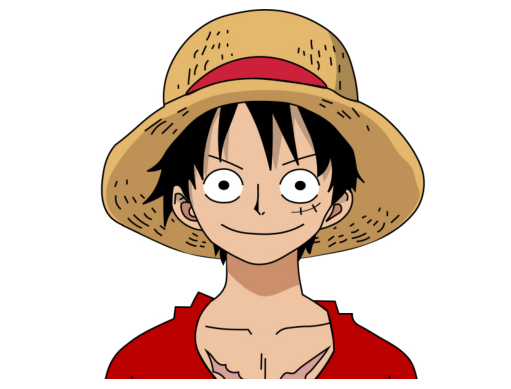

In [5]:
import os
# os.mkdir('data/A_File')
# os.makedirs('data/A_File/B_File')
# os.path.exists('data/A_File')
# os.path.isdir('data/A_File')

# Creating nested directories
# os.makedirs('p-dir/ch-dir')

# os.mkdir('data/test_dir')

# Checks if directory exists
if os.path.exists('data/test-dir'):
    print("Directory Exists.\n")
else:
    print('Directory does not exists \n')
    # os.makedirs('data/test-dir')
    # print("new directory created......")

# Checking if a directory exists
print("CHECKING IF A DIRECTORY EXISTS ::::> \n")
if os.path.isdir('data/test_dir'):
    print("It's a directory.")
else:
    print("It's not a directory")


# List contents of the directory
contents = os.listdir('data/test_dir')
for content in contents:
    
    print(content)

# printing image if the directory has one
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

# Path to the directory you want to check
dir_path = "data/test_dir"

# Check if the directory contains any image files (e.g., .jpg, .png)
image_extensions = ('.jpg', '.jpeg', '.png', '.bmp', '.gif')

# List all files in the directory
image_files = [f for f in os.listdir(dir_path) if f.lower().endswith(image_extensions)]

# If there are any image files, display the first one
if image_files:
    image_path = os.path.join(dir_path, image_files[0])
    img = mpimg.imread(image_path)  # Load the image
    plt.imshow(img)  # Display the image
    plt.axis('off')  # Turn off axis
    plt.show()  # Show the image
else:
    print("No image files found in the directory.")


# Python(Group A)

## Loading and Displaying the Car Evaluation Dataset from UCI Repository

In [3]:
import pandas as pd

# URL of the dataset
url = "https://archive.ics.uci.edu/ml/machine-learning-databases/car/car.data"

# Load the dataset into a pandas DataFrame
columns = ["buying", "maint", "doors", "persons", "lug_boot", "safety", "class"]
car_data = pd.read_csv(url, names=columns)

# Display the first few rows of the dataset
car_data.head()


,buying,maint,doors,persons,lug_boot,safety,class
0,vhigh,vhigh,2,2,small,low,unacc
1,vhigh,vhigh,2,2,small,med,unacc
2,vhigh,vhigh,2,2,small,high,unacc
3,vhigh,vhigh,2,2,med,low,unacc
4,vhigh,vhigh,2,2,med,med,unacc


## Checking for Missing Values, Data Types, and Basic Statistics

In [4]:
# Check for missing values
print(car_data.isnull().sum())

# Display data types of each column
print(car_data.dtypes)

# Display basic statistics of the dataset
print(car_data.describe(include='all'))


buying      0
maint       0
doors       0
persons     0
lug_boot    0
safety      0
class       0
dtype: int64
buying      object
maint       object
doors       object
persons     object
lug_boot    object
safety      object
class       object
dtype: object
       buying  maint doors persons lug_boot safety  class
count    1728   1728  1728    1728     1728   1728   1728
unique      4      4     4       3        3      3      4
top     vhigh  vhigh     2       2    small    low  unacc
freq      432    432   432     576      576    576   1210


## Encoding Categorical Variables Using LabelEncoder

In [5]:
from sklearn.preprocessing import LabelEncoder

# Initialize the LabelEncoder
label_encoder = LabelEncoder()

# Apply label encoding to each column
for column in car_data.columns:
    car_data[column] = label_encoder.fit_transform(car_data[column])

# Display the first few rows of the encoded dataset
car_data.head()


,buying,maint,doors,persons,lug_boot,safety,class
0,3,3,0,0,2,1,2
1,3,3,0,0,2,2,2
2,3,3,0,0,2,0,2
3,3,3,0,0,1,1,2
4,3,3,0,0,1,2,2


## Separating Features and Target Variable, and Splitting the Data into Training and Test Sets

In [6]:
from sklearn.model_selection import train_test_split

# Separate features and target variable
X = car_data.drop("class", axis=1)
y = car_data["class"]

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Display the shape of the training and test sets
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)


(1382, 6) (346, 6) (1382,) (346,)


## Training the Gaussian Naive Bayes Model

In [7]:
from sklearn.naive_bayes import GaussianNB

# Initialize the Gaussian Naive Bayes model
gnb = GaussianNB()

# Train the model
gnb.fit(X_train, y_train)


GaussianNB()

## Evaluating the Model Performance

In [2]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Predict the target variable for the test data
y_pred = gnb.predict(X_test)

# Calculate the accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy}")

# Display the classification report with zero_division parameter
print("Classification Report:")
print(classification_report(y_test, y_pred, zero_division=1))

# Display the confusion matrix
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))

Accuracy: 0.6242774566473989
Classification Report:
              precision    recall  f1-score   support

           0       0.50      0.10      0.16        83
           1       1.00      0.00      0.00        11
           2       0.82      0.81      0.82       235
           3       0.17      1.00      0.30        17

    accuracy                           0.62       346
   macro avg       0.62      0.48      0.32       346
weighted avg       0.72      0.62      0.61       346

Confusion Matrix:
[[  8   0  38  37]
 [  3   0   3   5]
 [  5   0 191  39]
 [  0   0   0  17]]


## Car Evaluation Classification using Gaussian Naive Bayes

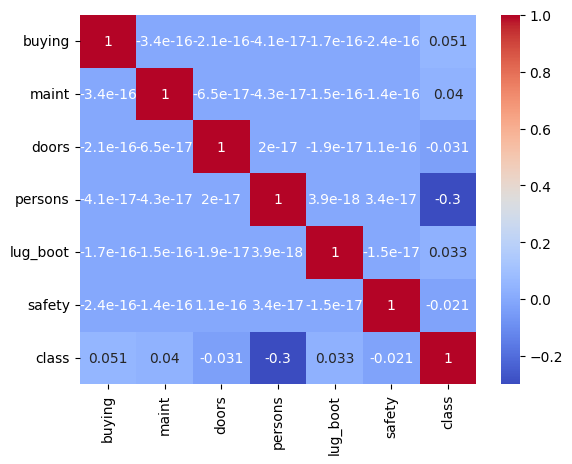

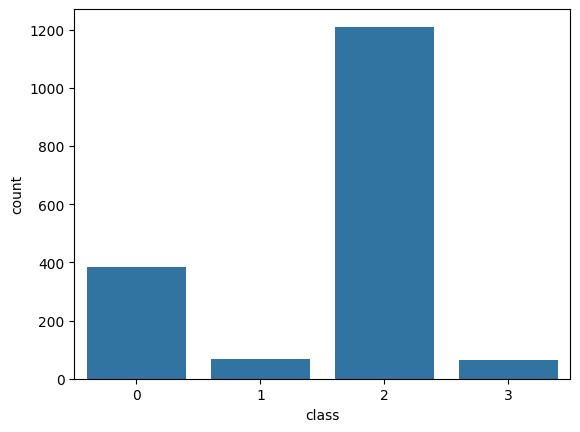

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder

# Load the dataset
url = "https://archive.ics.uci.edu/ml/machine-learning-databases/car/car.data"
columns = ["buying", "maint", "doors", "persons", "lug_boot", "safety", "class"]
car_data = pd.read_csv(url, names=columns)

# Encode categorical variables
label_encoder = LabelEncoder()
for column in car_data.columns:
    car_data[column] = label_encoder.fit_transform(car_data[column])

# Now, compute the correlation matrix
sns.heatmap(car_data.corr(), annot=True, cmap='coolwarm')
plt.show()

# Visualize the class distribution
sns.countplot(x='class', data=car_data)
plt.show()


# Group B

First few rows of the dataset:
    age  sex   cp  trestbps   chol  fbs  restecg  thalach  exang  oldpeak  \
0  63.0  1.0  1.0     145.0  233.0  1.0      2.0    150.0    0.0      2.3   
1  67.0  1.0  4.0     160.0  286.0  0.0      2.0    108.0    1.0      1.5   
2  67.0  1.0  4.0     120.0  229.0  0.0      2.0    129.0    1.0      2.6   
3  37.0  1.0  3.0     130.0  250.0  0.0      0.0    187.0    0.0      3.5   
4  41.0  0.0  2.0     130.0  204.0  0.0      2.0    172.0    0.0      1.4   

   slope   ca  thal  num  
0    3.0  0.0   6.0    0  
1    2.0  3.0   3.0    2  
2    2.0  2.0   7.0    1  
3    3.0  0.0   3.0    0  
4    1.0  0.0   3.0    0  

Data Info:
<class 'pandas.core.frame.DataFrame'>
Index: 297 entries, 0 to 301
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       297 non-null    float64
 1   sex       297 non-null    float64
 2   cp        297 non-null    float64
 3   trestbps  297 non-null    float6

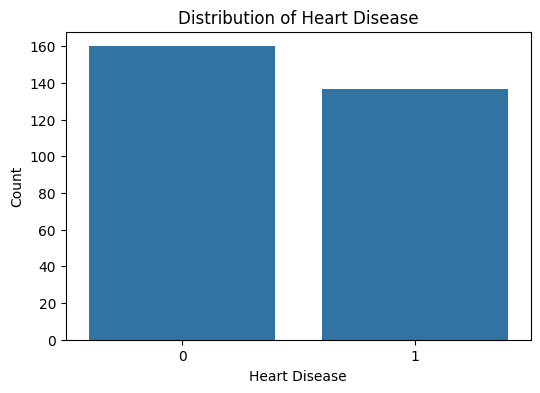

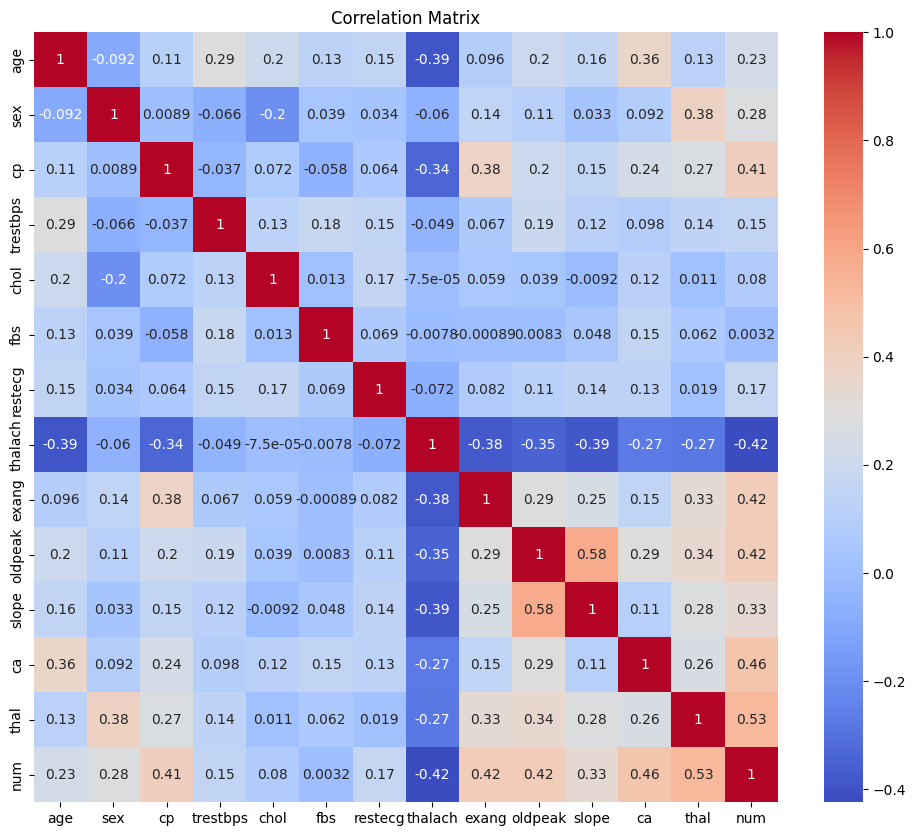

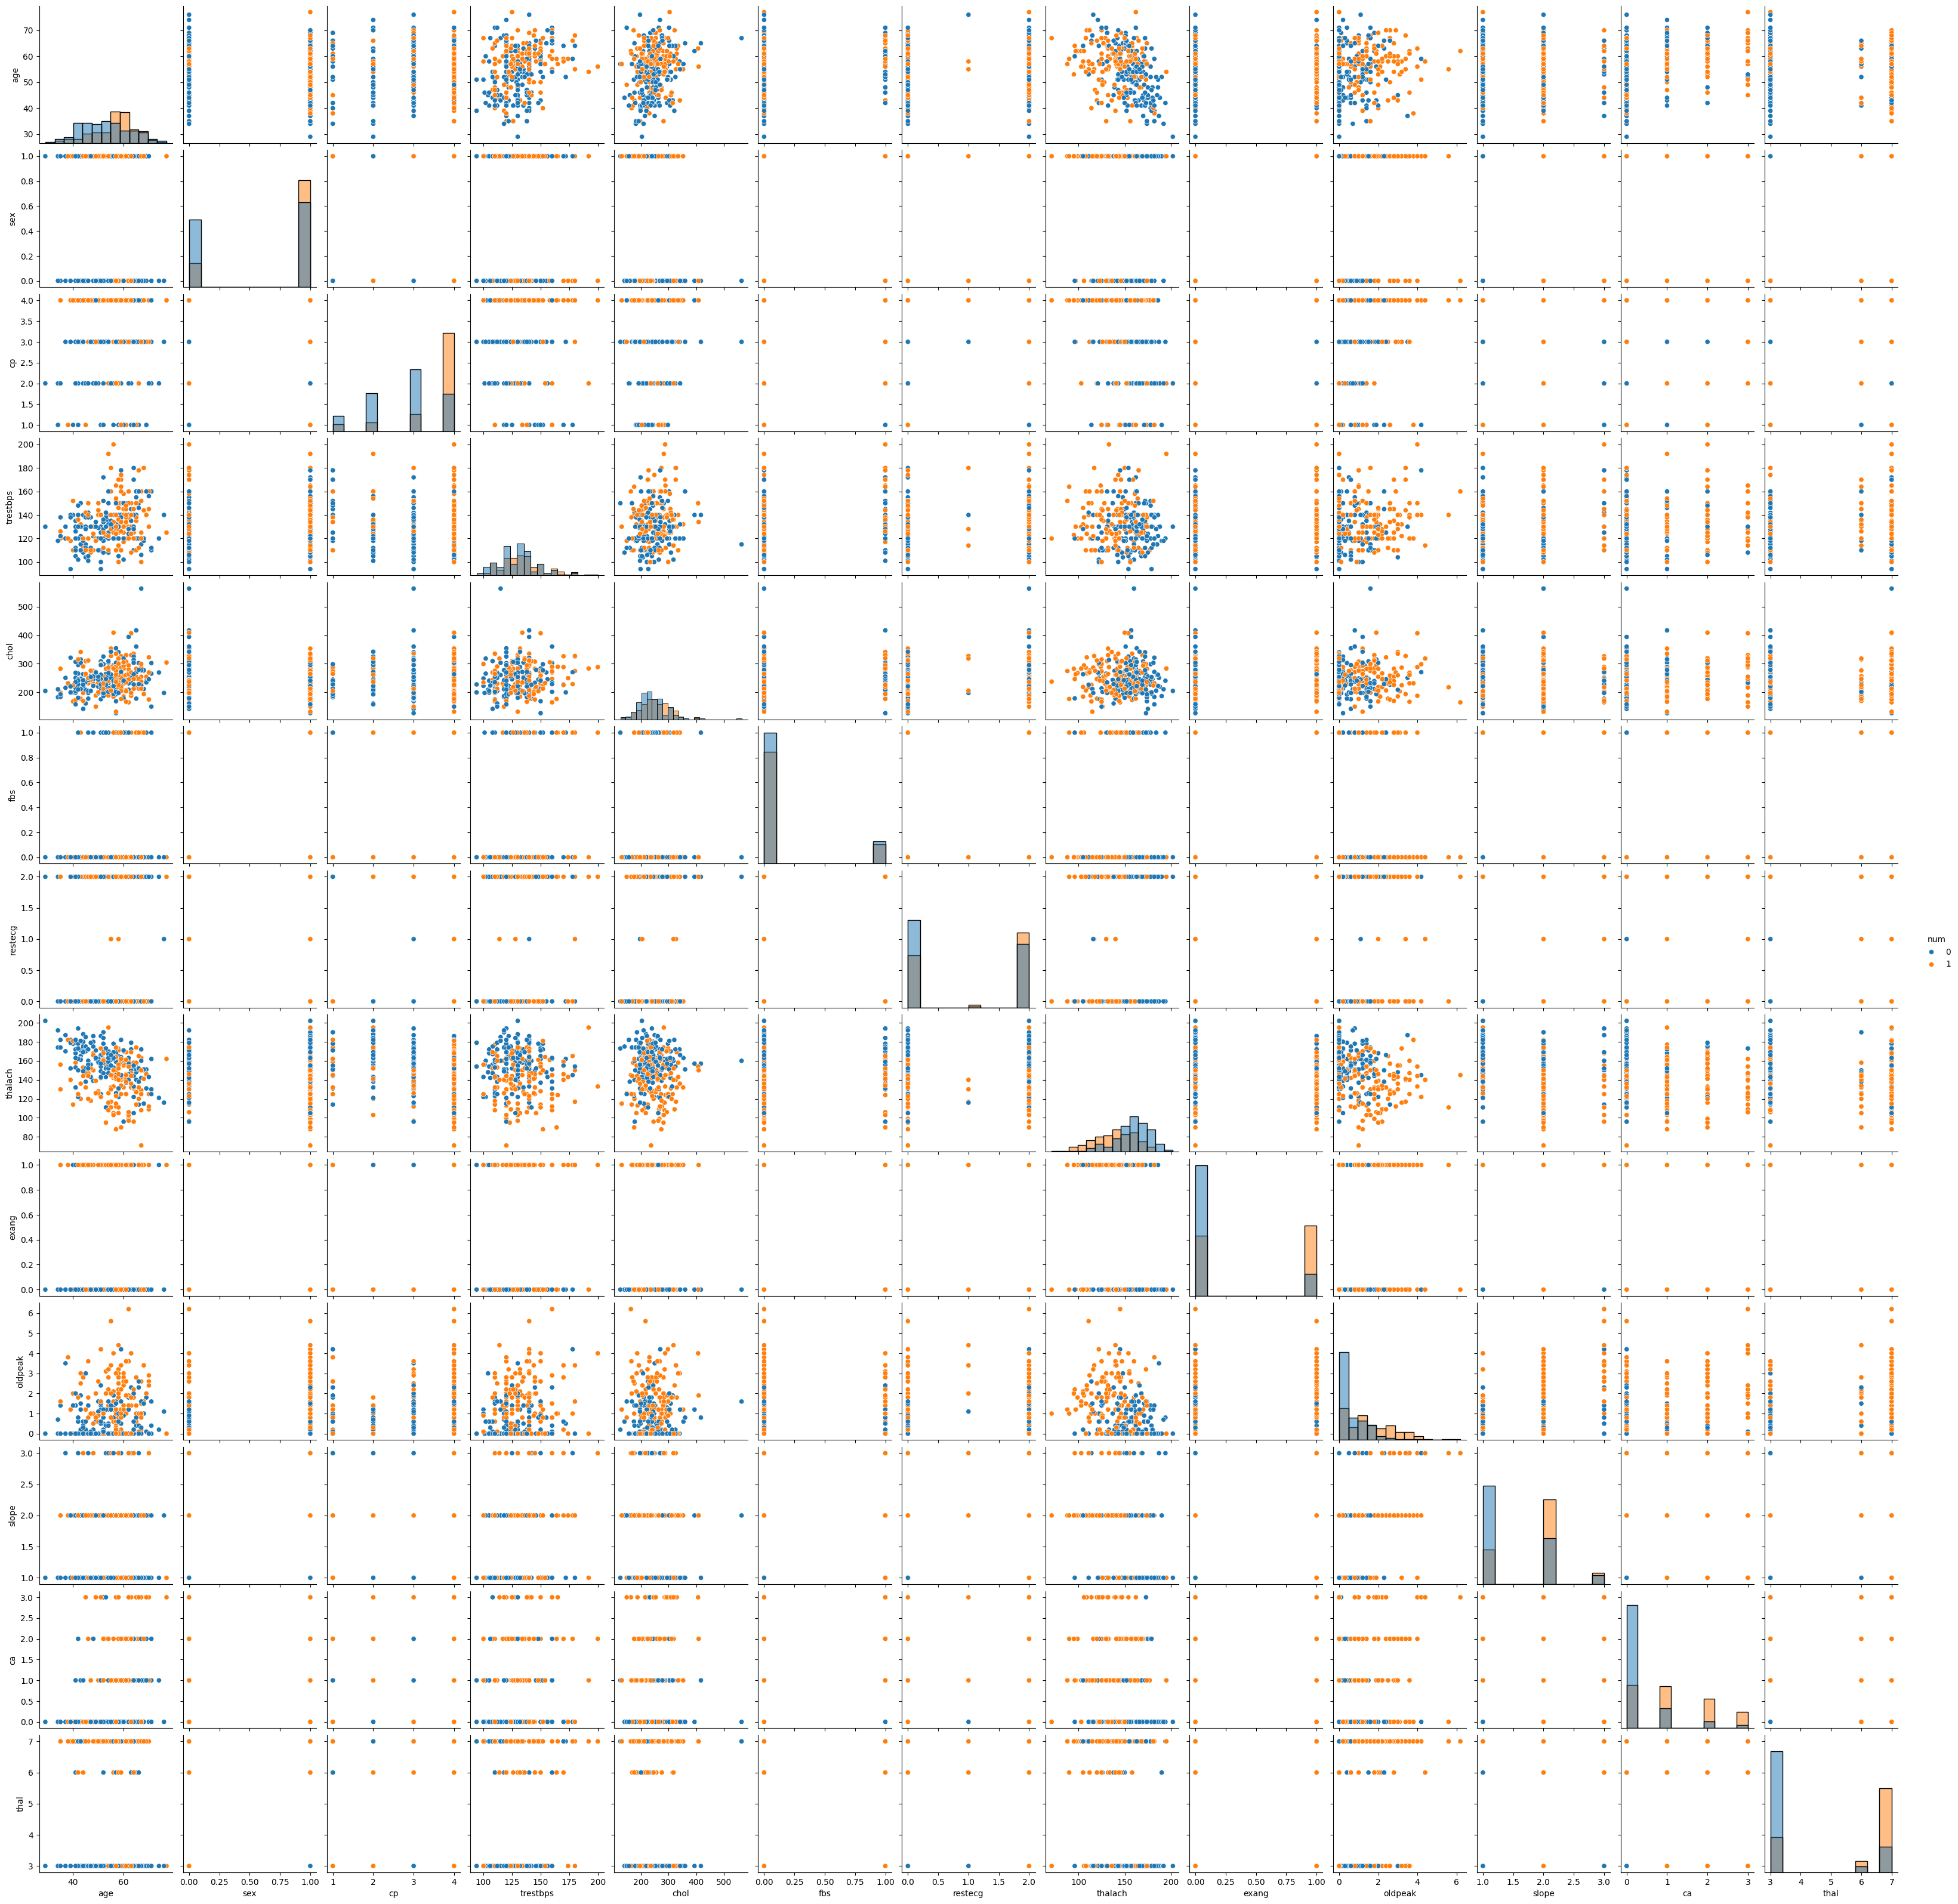

Accuracy: 0.92

Classification Report:
              precision    recall  f1-score   support

           0       0.90      0.97      0.93        36
           1       0.95      0.83      0.89        24

    accuracy                           0.92        60
   macro avg       0.92      0.90      0.91        60
weighted avg       0.92      0.92      0.92        60


Confusion Matrix:


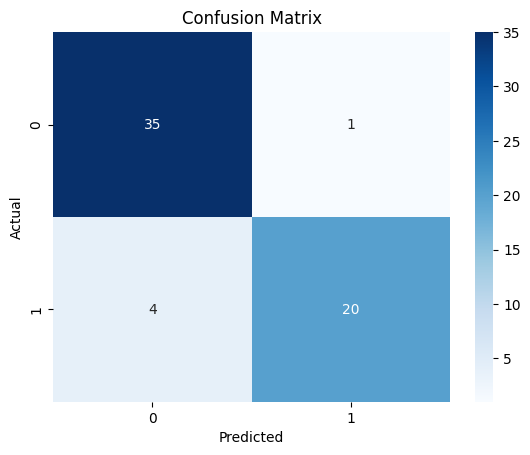

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Load the dataset
url = "https://archive.ics.uci.edu/ml/machine-learning-databases/heart-disease/processed.cleveland.data"
column_names = ['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach', 'exang', 
                'oldpeak', 'slope', 'ca', 'thal', 'num']
data = pd.read_csv(url, header=None, names=column_names, na_values='?')

# Display the first few rows
print("First few rows of the dataset:")
print(data.head())

# Data processing
# Handle missing values by dropping rows with missing values
data = data.dropna()

# Convert the target variable 'num' to a binary classification: 0 (no disease) and 1 (disease)
data['num'] = data['num'].apply(lambda x: 1 if x > 0 else 0)

# Display data info and description
print("\nData Info:")
print(data.info())
print("\nData Description:")
print(data.describe())

# Exploratory Data Analysis (EDA)
# Visualize the distribution of the target variable
plt.figure(figsize=(6, 4))
sns.countplot(x='num', data=data)
plt.title('Distribution of Heart Disease')
plt.xlabel('Heart Disease')
plt.ylabel('Count')
plt.show()

# Visualize the correlation matrix
plt.figure(figsize=(12, 10))
correlation_matrix = data.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

# Visualize relationships between features and the target variable
sns.pairplot(data, hue='num', diag_kind='hist')
plt.show()

# Split the dataset into training and testing sets
X = data.drop('num', axis=1)
y = data['num']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Build the Gaussian Naive Bayes model
gnb = GaussianNB()
gnb.fit(X_train, y_train)

# Make predictions
y_pred = gnb.predict(X_test)

# Evaluate the model's performance
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy:.2f}')

print("\nClassification Report:")
print(classification_report(y_test, y_pred))

print("\nConfusion Matrix:")
conf_matrix = confusion_matrix(y_test, y_pred)
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()
